In [180]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import numpy as np
from sklearn.decomposition import PCA
df=pd.read_csv('top50.csv', encoding='latin1')
df.drop(['Unnamed: 0', 'Artist_Name', 'Genre'], axis=1, inplace=True)
df.rename(columns={'Beats.Per.Minute': 'BPM'}, inplace=True)
df.set_index('Track_Name', inplace=True)


In [181]:
df

,BPM,Energy,Danceability,Loudness_dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
Track_Name,,,,,,,,,,
Senorita,117,55,76,-6,8,75,191,4,3,79
China,105,81,79,-4,8,61,302,8,9,92
boyfriend (with Social House),190,80,40,-4,16,70,186,12,46,85
Beautiful People (feat. Khalid),93,65,64,-8,8,55,198,12,19,86
Goodbyes (Feat. Young Thug),150,65,58,-4,11,18,175,45,7,94
I Don't Care (with Justin Bieber),102,68,80,-5,9,84,220,9,4,84
Ransom,180,64,75,-6,7,23,131,2,29,92
How Do You Sleep?,111,68,48,-5,8,35,202,15,9,90
Old Town Road - Remix,136,62,88,-6,11,64,157,5,10,87


C:\Users\jkleh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jkleh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jkleh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

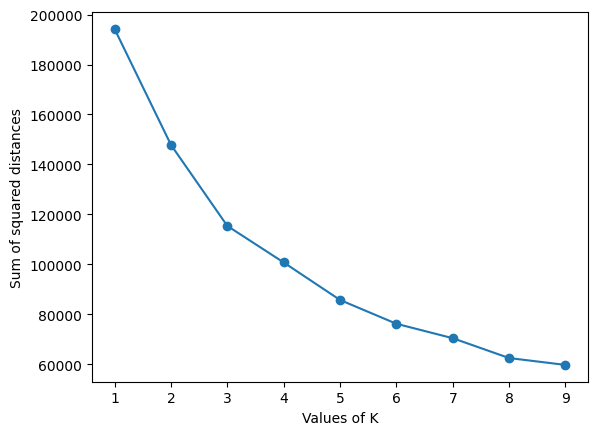

In [182]:
elbow_scores = dict()
range_of_k = range(1,10) 
for k in range_of_k :
 untrained_model = KMeans(n_clusters=k)
 trained_model=untrained_model.fit(df)
 elbow_scores[k]=trained_model.inertia_
 
plt.plot(elbow_scores.keys(),elbow_scores.values())
plt.scatter(elbow_scores.keys(),elbow_scores.values())
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances") 
plt.show()

In [183]:
song_map = df.to_dict(orient='index')

In [184]:
from sklearn.cluster import KMeans
k = 3
cluster_model = KMeans(n_clusters=k)
cluster_model.fit(df)
KMeans()
cluster_labels = cluster_model.predict(df)
artist_cluster_df = pd.DataFrame(cluster_labels, index=df.index, columns=["cluster"])
artist_cluster_df["cluster"].value_counts()
for cluster,songs in artist_cluster_df.groupby("cluster"):
    print("Cluster:", cluster, "Size:", songs.shape[0])
    
    for a_id in songs.sample(7).index:
        print("\t", a_id)

Cluster: 0 Size: 7
	 Otro Trago - Remix
	 Soltera - Remix
	 No Me Conoce - Remix
	 No Guidance (feat. Drake)
	 China
	 LA CANCIÓN
	 Callaita
Cluster: 1 Size: 16
	 bad guy (with Justin Bieber)
	 Te Robaré
	 Antisocial (with Travis Scott)
	 boyfriend (with Social House)
	 Panini
	 Lalala
	 Otro Trago
Cluster: 2 Size: 27
	 Beautiful People (feat. Khalid)
	 Loco Contigo (feat. J. Balvin & Tyga)
	 Happier
	 Never Really Over
	 Cross Me (feat. Chance the Rapper & PnB Rock)
	 Takeaway
	 It's You


C:\Users\jkleh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


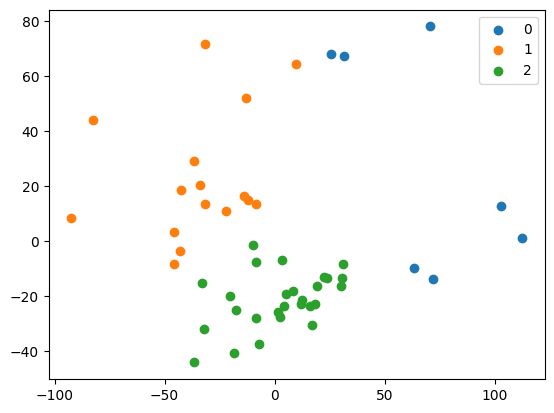

In [185]:
pca = PCA(2)
df = pca.fit_transform(df)
u_labels = np.unique(cluster_labels)
 
for i in u_labels:
    plt.scatter(df[cluster_labels == i , 0] , df[cluster_labels == i , 1] , label = i)
plt.legend()
plt.show()
 